# Classification Metrics

## 1. Accuracy

In [1]:
import numpy as np 
import pandas as pd 

In [4]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DecisionTreeClassifier()

In [6]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.9016393442622951
Accuracy of Decision Trees 0.8360655737704918


## 2. Confusion matrix

In [8]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))


Logistic Regression Confusion Matrix



,0,1
0,26,6
1,0,29


In [9]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,24,8
1,2,27


In [10]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
292,0,0,0
184,0,0,0
175,0,0,0
13,1,1,0
288,0,0,0
234,0,0,0
231,0,0,0
197,0,0,1
169,0,0,0
89,1,1,1


## 3. Precision, Recall, F1 score

In [12]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  26   6
1   0  29
--------------------------------------------------
Precision -  0.8285714285714286
Recall -  1.0
F1 score -  0.90625


In [13]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred2))
print("Recall - ",recall_score(y_test,y_pred2))
print("F1 score - ",f1_score(y_test,y_pred2))

For DT Model
--------------------------------------------------
    0   1
0  24   8
1   2  27
--------------------------------------------------
Precision -  0.7714285714285715
Recall -  0.9310344827586207
F1 score -  0.8437500000000001


## Iris dataset

In [20]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()

In [28]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=43)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DecisionTreeClassifier()

In [38]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 1.0
Accuracy of Decision Trees 0.9


Logistic Regression Confusion Matrix

    0  1  2
0  13  0  0
1   0  8  0
2   0  0  9


<AxesSubplot:>

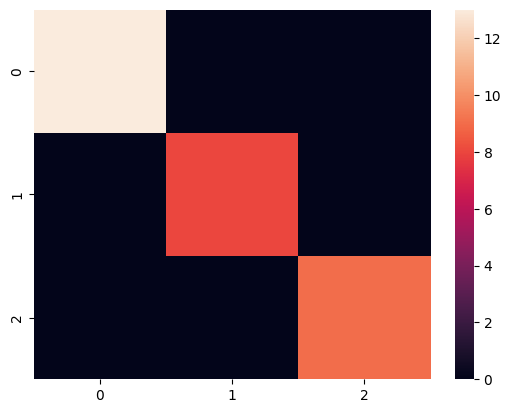

In [45]:
print("Logistic Regression Confusion Matrix\n")
print(pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,3))))
# make heat_map of the above
import seaborn as sns
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,3))) , )

Decision Tree Confusion Matrix

    0  1  2
0  13  0  0
1   0  7  1
2   0  2  7


<AxesSubplot:>

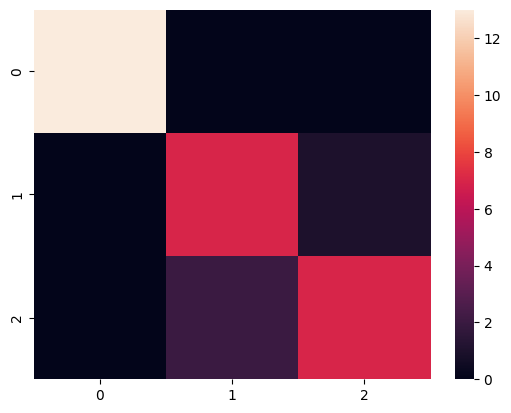

In [46]:
print("Decision Tree Confusion Matrix\n")
print(pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,3))))
# make heat_map of the above
import seaborn as sns
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,3))) , )

## MNIST Dataset

In [47]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('data/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DecisionTreeClassifier()

In [51]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.9145238095238095
Accuracy of Decision Trees 0.8522619047619048


In [53]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,10)))

Logistic Regression Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,791,0,1,0,1,9,11,1,6,1
1,0,938,2,4,0,3,0,3,12,0
2,2,9,745,16,9,4,13,13,15,3
3,1,4,19,763,0,36,5,5,20,11
4,2,5,4,0,804,1,7,3,9,21
5,9,3,4,23,10,610,15,10,34,11
6,12,4,12,1,7,8,789,0,5,1
7,3,2,13,6,4,2,0,812,2,29
8,11,12,13,18,1,21,6,6,694,11
9,3,6,2,14,25,4,0,37,7,736


<AxesSubplot:>

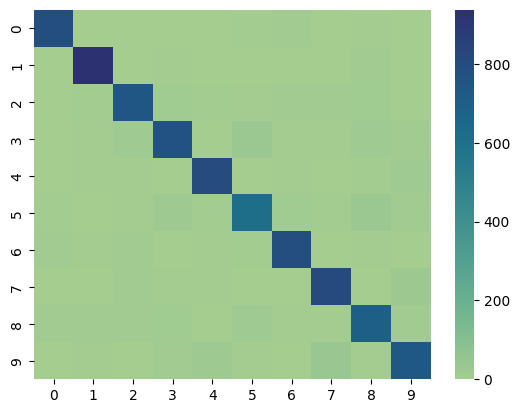

In [55]:
#heatmap
import seaborn as sns

sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,10))) , cmap='crest')

In [56]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,10)))

Decision Tree Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,754,3,11,6,4,18,10,2,10,3
1,1,901,14,12,6,3,5,4,12,4
2,13,22,661,36,14,15,15,26,20,7
3,5,16,32,684,8,47,7,17,28,20
4,7,6,11,4,735,12,13,9,20,39
5,11,7,11,36,11,574,19,10,28,22
6,8,1,8,9,11,20,761,0,14,7
7,2,12,21,13,7,3,0,789,6,20
8,7,13,28,40,14,32,13,7,624,15
9,5,8,9,12,50,19,4,27,24,676


<AxesSubplot:>

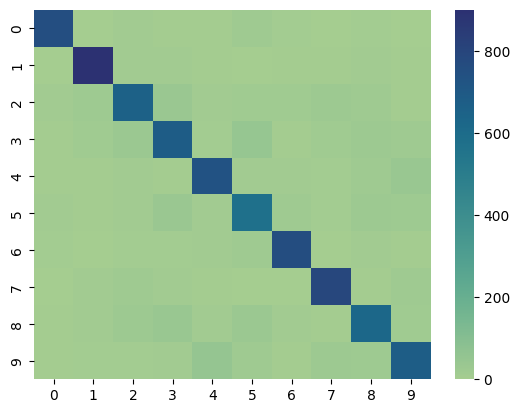

In [57]:
#heatmap
import seaborn as sns

sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,10))) , cmap='crest')

# Classification report generates Precision, Recall & F1score for all categories

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       821
           1       0.95      0.98      0.96       962
           2       0.91      0.90      0.91       829
           3       0.90      0.88      0.89       864
           4       0.93      0.94      0.94       856
           5       0.87      0.84      0.85       729
           6       0.93      0.94      0.94       839
           7       0.91      0.93      0.92       873
           8       0.86      0.88      0.87       793
           9       0.89      0.88      0.89       834

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

